In [1]:
# pip install opencv-python

In [1]:
from PIL import Image #importing the python image library for PIL
import os,cv2
import random
import numpy as np
import pandas as pd
from scipy import misc 
import matplotlib.image as mpimg

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,InputLayer

In [13]:
root_dir = os.path.abspath('.')
data_dir_test = './datasets/misctest'
data_dir = './datasets/misctrain'
train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir_test, 'test.csv'))

In [18]:
from scipy.misc import imresize
from scipy.misc import imread

temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path,mode='L')
    img = imresize(img, (64, 64))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)

/Users/payalchodha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/Users/payalchodha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [19]:
train_x = train_x / 255


In [20]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir_test, 'Test', img_name)
    img = imread(img_path,mode='L')
    img = imresize(img, (64, 64))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

/Users/payalchodha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/Users/payalchodha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [21]:
test_x = test_x/255

In [9]:
import tensorflow.keras
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from tensorflow.python.keras.utils import np_utils
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = np_utils.to_categorical(train_y)
# train_y = utils.to_categorical(train_y,3)
# train_y

In [15]:
input_num_units = (64, 64, 1)
hidden_num_units = 500
output_num_units = 3

epochs =20
batch_size = 128

In [19]:
train_x= train_x.reshape(train_x.shape[0],64,64,1)

In [20]:
test_x= test_x.reshape(test_x.shape[0],64,64,1)

# Convolutional model

In [210]:
type(train_x)

numpy.ndarray

In [222]:
train.Class.value_counts()

MIDDLE    10804
YOUNG      6706
OLD        2396
Name: Class, dtype: int64

In [212]:
# Instantiate a CNN.
cnn_model = Sequential()

In [213]:
# Add a convolutional layer.

cnn_model.add( Conv2D(filters = 32, # number of filters
               kernel_size = (3,3),# height/width of filter
               activation='relu', # activation function 
              input_shape=(64,64,1))) # shape of input (image)
cnn_model.add(MaxPooling2D(pool_size = (2, 2))) # dimensions of region of pooling # dimensions of region of pooling
# cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Conv2D(filters = 64,
                     kernel_size=(3,3),
                     activation='relu')) 

cnn_model.add(MaxPooling2D(pool_size=(2,2)))
# cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Flatten(input_shape = (64,64,1)))
# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(512,activation='relu'))
cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dropout(rate=0.5))
# Add a final layer with 3 neurons.
cnn_model.add(Dense(3,activation='softmax'))

In [214]:
# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [233]:
# Fit Convolutional model on training data with class weights
history_cnn = cnn_model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1,class_weight=class_weights, validation_split=0.33)

Train on 15924 samples, validate on 3982 samples
Epoch 1/20
15924/15924 [==============================] - 101s 6ms/sample - loss: 0.1123 - accuracy: 0.9605 - val_loss: 1.0862 - val_accuracy: 0.7486
Epoch 2/20
15924/15924 [==============================] - 86s 5ms/sample - loss: 0.0960 - accuracy: 0.9664 - val_loss: 1.2217 - val_accuracy: 0.7501
Epoch 3/20
15924/15924 [==============================] - 83s 5ms/sample - loss: 0.0892 - accuracy: 0.9689 - val_loss: 1.1084 - val_accuracy: 0.7516
Epoch 4/20
15924/15924 [==============================] - 81s 5ms/sample - loss: 0.0823 - accuracy: 0.9712 - val_loss: 1.1568 - val_accuracy: 0.7564
Epoch 5/20
15924/15924 [==============================] - 81s 5ms/sample - loss: 0.0814 - accuracy: 0.9702 - val_loss: 1.2048 - val_accuracy: 0.7544
Epoch 6/20
15924/15924 [==============================] - 84s 5ms/sample - loss: 0.0784 - accuracy: 0.9730 - val_loss: 1.1821 - val_accuracy: 0.7459
Epoch 7/20
15924/15924 [==============================] 

In [226]:
# using class-weights to fix the issue of unbalance classes
from sklearn.utils import class_weight

y_ints = [y.argmax() for y in train_y]



class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_ints),
                                                 y_ints)

class_weight_dict = dict(enumerate(class_weights))

class_weight_dict

/Users/payalchodha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/Users/payalchodha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


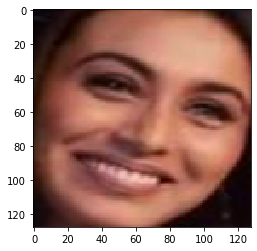

Predicted: YOUNG


In [244]:
i = random.choice(test.index)
img_name = test.ID[i]

img = imread(os.path.join(data_dir_test, 'Test', img_name)).astype('float32')
img =imresize(img, (128, 128))
imgplot = plt.imshow(img)
plt.show()
# //imshow(imresize(img, (128, 128)))
preds = cnn_model.predict_classes(test_x)
preds = lb.inverse_transform(preds)
print(f'Predicted: {preds[i]}')